Mestna občina Ljubljana je objavila [video o vedenju kolesarjev v Ljubljani](https://www.youtube.com/watch?v=nmhrbzplGX4). Na kratko: MOL izpostavlja tipične navade ljubljanskih kolesarjev, kot so divji spusti po stopnicah, divjanje med pešci in tako naprej. Ker je osnovno prevozno sredstvo vašega profesorja kolo in ker tretjino letne kilometrine žal opravi v Ljubljani, pri čemer se od (domnevne večine) ostalih kolesarjev razlikuje po tem, da nekaterih od teh veščin ne obvlada (večine ostalih pa noče prakticirati), vas prosi, da mu za lažje načrtovanje poti rešite tole nalogo. Hvala vnaprej.

---

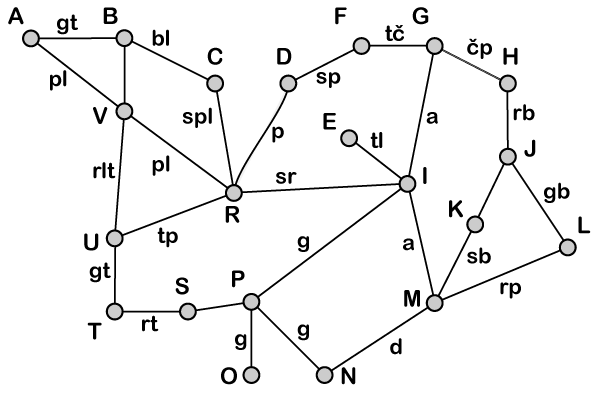

Zemljevid na sliki kaže 21 točk v Ljubljani (zaradi varstva osebnih podatkov smo imena lokacij zamenjali s črkami od A do V) in povezave med njimi. Povezave zahtevajo različne veščine: kdor hoče, na primer priti iz točke B do C, mora obvladati vožnjo med odvrženimi skiroji in slalom med cvetličnimi lonci.

Celoten seznam veščin, ki se pojavljajo v nalogi, je:

- **s**topnice: Spust po stopnicah
- **p**ešci: Divjanje med pešci
- **l**onci: Slalom med cvetličnimi lonci
- **b**olt: Slalom med odvrženimi skiroji
- **r**obnik: Skok na robnik pločnika
- **g**ravel: Vožnja po razsutem makadamu
- **t**rava: Oranje zelenic parkov
- **a**vtocesta: Vožnja po avtocesti
- **č**repinje: Vožnja po razbiti steklovini
- ro**d**eo: Vožnja po kolesarski poti skozi Črnuče

Zemljevid na sliki zaradi pomanjkanja prostora uporablja enočrkovne okrajšave veščin, v sami nalogi pa je zapisan takole:

```
A, B, C, D, E, F, G, H, I, J, K, L, M, N, O, P, R, S, T, U, V = "ABCDEFGHIJKLMNOPRSTUV"

zemljevid = {
    (A, B): "gravel trava",
    (A, V): "pešci lonci",
    (B, C): "bolt lonci",
    (B, V): "",
    (C, R): "stopnice pešci lonci",
    ... in tako naprej
}
```

Ključi zemljevida so pari povezanih točk, pripadajoča vrednost pa je niz, ki vsebuje s presledkom ločene okrajšave veščin. Tako vidimo pod ključem `(B, C)` zapisano `"bolt lonci"`, kar je okrajšava za veščini *Slalom med odvrženimi skiroji* in *Slalom med cvetličnimi lonci*.

Vse povezave so dvosmerne, saj lahko MOL poljubno površino, namenjeno kolesarjem, označi kot dvosmerno. Če v zemljevidu obstaja ključ `(A, B)`, obstaja tudi ključ `(B, A)`.

## Naloga

Napiši naslednje funkcije (poleg njih pa, po želji, poljubno število drugih funkcij):

- `mozna_pot(pot, vescine, zemljevid)` prejme `pot` v obliki niza z zaporedjem križišč, seznam veščin, ki jih obvlada kolesar, in `zemljevid` v obliki iz uvoda naloge. Funkcija mora vrniti točko, do katere bo uspel pripeljati kolesar, torej točko, iz katere ne bo mogel naprej, ker želena povezava ne obstaja ali pa je med veščinami, ki so potrebne, da jo prevozi, tudi ena ali več veščin, ki jih kolesar ne obvlada.
  
    - Klic `mozna_pot("RIPOPSTUVR", ["stopnice", "robnik", "gravel", "trava"], zemljevid)` vrne "U", saj luzer ne zna slalomirati med cvetličnimi lonci, postavljeni med U in V.

    - Klic `mozna_pot("RIPOPAB", ["stopnice", "robnik", "gravel", "trava"], zemljevid)` vrne "P", saj med P in A ni povezave.

    - Klic `mozna_pot("RIPOPS", ["stopnice", "robnik", "gravel", "trava"], zemljevid)` vrne "S", saj na poti ni nič takšnega, česar ne bi obvladal.

### Rešitev

Naloga je podobna nalogi `prevozno` s prejšnjega tedna, le da je poleg tega, ali povezava obstaja, potrebno preveriti še, ali kolesar obvlada veščine, ki jih zahteva povezava.

In [1]:
def mozna_pot(pot, vescine, zemljevid):
    vescine = set(vescine)
    for povezava in zip(pot, pot[1:]):
        if povezava not in zemljevid or not vescine >= set(zemljevid[povezava].split()):
            return povezava[0]
    return pot[-1]

Bistveni trik je tale: oboje, veščine, ki jih obvlada kolesar in veščine, ki jih zahteva povezava, pretvorimo v množice. Veščine, pripisane povezavam, so zapisane v nizu, na primer `"trava gravel robnik"`. Niz s `split()` razbijemo v seznam besed (`["trava", "gravel", "robnik"]`), nato pa ga s `set` spremenimo v množico (`["trava", "gravel", "robnik"}`). (V izogib dlakocepcem: seznam podamo funkciji oz. konstruktorju `set` in ta vrne množico, ki vsebuje elemente podanega seznama.)

Potem z `>=` preverjamo, ali so kolesarjeve veščine nadmnožica zahtevanih. Če niso, vrnemo `False`. Seveda bi lahko pisali tudi `if (...) or not set(zemljevid[povezava]) <= vescine` ali pa z `if (...) or set(zemljevid[povezava]) - vescine` preverili, ali množica zahtevanih veščin vsebuje kaj, kar ni našteto med kolesarjevimi veščinami.

Lahko pa se znajdemo in namesto da bi preverili, ali povezava obstaja, pokličemo `zemljevid.get`, pri čemer za neobstoječe povezave vrnemo veščino, ki je ne obvlada noben kolesar, recimo letenje (razen čez balanco).

In [2]:
def mozna_pot1(pot, vescine, zemljevid):
    vescine = set(vescine)
    for povezava in zip(pot, pot[1:]):
        if vescine >= set(zemljevid.get(povezava, "letenje").split()):
            return povezava[0]
    return pot[-1]

Podoben trik bo uporaben tudi v prihodnjih funkcijah, zato si lahko pripravimo kar funckijo `potrebne(zmeljevid, povezava)`, ki prejme zemljevid in povezavo ter vrne *množico* veščin, ki jih mora obvladati kolesar. Če povezave ni, reče, da bi moral kolesar znati leteti.

In [3]:
def potrebne(zemljevid, povezava):
    return set(zemljevid.get(povezava, "letenje").split())

S to funkcijo se funkcija, ki jo zahteva naloga, še nekoliko poenostavi:

In [4]:
def mozna_pot(pot, vescine, zemljevid):
    vescine = set(vescine)
    for povezava in zip(pot, pot[1:]):
        if not vescine >= potrebne(zemljevid, povezava):
            return povezava[0]
    return pot[-1]

Bistvo te naloge je bilo uporabljati množice - konkretno, tule, pod- ali nadmnožice. Rešitve, ki namesto tega uporabljajo zanke ali funkcije `all` in `any` so preveč zapletene (pa še počasne, pa še stvari, ki se jih še nismo učili in jih morda še ne znamo uporabljajo).

## Naloga (nadaljevanje)

- `boljsa_pot((pot1, pot2, zemljevid)` prejme dve poti in vrne tisto, ki zahteva več *različnih* veščin, saj imajo takšne kolesarji menda rajši. Če obe poti zahtevata enako število različnih veščin, vrne `pot1`.
 
    Pri pisanju te funkcije smete predpostavljati, da vse povezave obstajajo.
    
### Rešitev

Za vsako pot je potrebno nabrati vse veščine, ki jih zahteva. Ker vsako veščino štejemo samo enkrat, bomo uporabili množice. In ker to počnemo za obe poti, bomo napisali kar pomožno funkcijo, ki ji podamo pot in vrne množico potrebnih veščin.

In [5]:
def potrebne_vescine(pot, zemljevid):
    vescine = set()
    for povezava in zip(pot, pot[1:]):
        vescine |= potrebne(zemljevid, povezava)
    return vescine

Funkcija `boljsa_pot` je zdaj preprosto

In [6]:
def boljsa_pot(pot1, pot2, zemljevid):
    if len(potrebne_vescine(pot1, zemljevid)) >= len(potrebne_vescine(pot2, zemljevid)):
        return pot1
    else:
        return pot2

Ali, če poznamo Pythonov ternarni operator `if-else`:

In [7]:
def boljsa_pot(pot1, pot2, zemljevid):
    return pot1 if len(potrebne_vescine(pot1, zemljevid)) >= len(potrebne_vescine(pot2, zemljevid)) else pot2

Brez pomožne funkcije bi v `boljsa_pot` pač dvakrat ponovili tiste tri vrstice, ki smo jih napisali v `potrebne_vescine`.

## Naloga (nadaljevanje)

- `manjkajoce_vescine(pot, vescine, zemljevid)` prejme pot, ki bi jo kolesar rad prevozil in veščine, ki jih obvlada. Vrniti moral število *različnih* veščin, ki se jih mora še naučiti, da bo lahko prevozil to pot.

    Tudi v tej funkciji smete predpostaviti, da vse povezave obstajajo.

    Klic `manjkajoce_vescine("RIPOPSTUVRIPSTUVR", ["stopnice", "robnik", "gravel"], zemljevid))` vrne `3`, ker se mora kolesar za to pot naučiti še vožnje po travi, med cvetličnimi lonci in med pešci.

### Rešitev

Ha, kako imenitno, da smo v prejšnji funkciji napisali pomožno funkcijo `potrebne_vescine`. Manjkajoče veščine so potem preprosto te, ki bi jih potrebovali, vendar jih nimamo, torej `potrebne_vescine(pot zemljevid) - set(vescine)`. Ker naloga zahteva, da vrnemo število manjkajočih veščin (da ne bi preveč očitno namignila, da je potrebno uporabljati množice), vrnemo velikost te množice.

In [8]:
def manjkajoce_vescine(pot, vescine, zemljevid):
    return len(potrebne_vescine(pot, zemljevid) - set(vescine))

## Naloga (nadaljevanje)

- `skupni_podvig(pot, vescine1, vescine2, zemljevid)` simulira vožnjo dveh kolesarjev, ki obvladata različne veščine. Vozita se na istem kolesu: eden vozi, drugi sedi na prtljažniku, štangi ali krmilu. Vsako povezavo na poti prevozi tisti, ki obvlada *vse* potrebne veščine za povezavo. Če jo zmoreta oba, vozi vsak pol povezava. Če je ne zmore noben, je pot končana.

    Funkcija mora vrniti par s številom povezav, ki jih prevozi prvi, in številom povezav, ki jih prevozi drugi kolesar.

    V tej funkciji ne smete predpostaviti, da vse povezave na poti obstajajo.

    Poglejmo klic

    ```python
    skupni_podvig("RVABCRD",
                  ["trava", "lonci", "bolt", "gravel", "stopnice"],
                  ["bolt", "lonci", "pešci"],
                  zemljevid))
    ``` 
  
    - Odseka RV in VA prevozi drugi kolesar, saj zahteva lonce in pešce; prvi pešcev ne obvlada.
    - Odsek AB prevozi prvi kolesar.
    - Odsek BC prevozita oba, torej vsak pol.
    - Odseka CR ne zna prevoziti nobeden: prvi ne obvlada pešcev, drugi pa stopnic. Zato se njuna pot tu konča.
    - Odseka RD se ne lotita, saj ne prideta do njega.

    Klic torej vrne `(1.5, 2.5)`.
    
### Rešitev

Če smo naredili vse prejšnje funkcije in obvladamo podmnožice, je to bolj naloga iz zlaganja pogojev. (Izkazalo se je, da kar koristna naloga, saj so si nekateri ob njej lomili zobe.)

In [9]:
def skupni_podvig(pot, vescine1, vescine2, zemljevid):
    prvi = drugi = 0
    vescine1 = set(vescine1)
    vescine2 = set(vescine2)
    for povezava in zip(pot, pot[1:]):
        vescine = potrebne(zemljevid, povezava)
        if vescine1 >= vescine:  # zna prvi
            if vescine2 >= vescine:  # zna tudi drugi
                prvi += 0.5  # točke obema
                drugi += 0.5
            else:
                prvi += 1  # ker zna samo prvi, točke njemu
        elif vescine2 >= vescine:  # prvi ni znal, drugi zna
            drugi += 1  # točke drugemu
        else:  # noben ne zna
            break
    return prvi, drugi

Razlaga je v komentarjih. Pomembno je, da je uporabimo `elif` in `else`, da ne bi večkrat prištevali točk.

Manj zobolomna je rešitev s trikom.

In [10]:
def skupni_podvig(pot, vescine1, vescine2, zemljevid):
    prvi = drugi = 0
    vescine1 = set(vescine1)
    vescine2 = set(vescine2)
    for povezava in zip(pot, pot[1:]):
        vescine = potrebne(zemljevid, povezava)
        zna1 = vescine1 >= vescine
        zna2 = vescine2 >= vescine
        if not (zna1 or zna2):
            break
        prvi += zna1 / (zna1 + zna2)
        drugi += zna2 / (zna1 + zna2)
    return prvi, drugi

`True` se v aritmetičnih operacijah vede kot `1` in `False` kot `0`, torej sta `zna1` in `zna2` v bistvu kot `0` ali `1`. Vanju zapišemo, ali prvi oz. drugi kolesar zmore prevoziti povezavo. Če je ne zmore noben, prekinemo zanko. Sicer pa k vsakemu prištejemo to, ali jo zna, vendar to delimo z vsoto `zna1 + zna2`, ki bo enak `1`, če veščino obvlada le eden, in `2`, če jo oba.